In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow as tf
import joblib

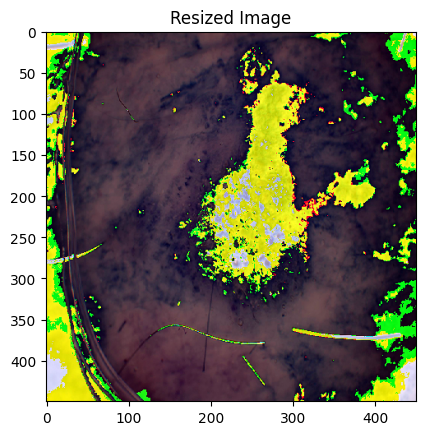

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Feature vector shape: (1, 460800)
Predictions: [5]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:03:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:03:00] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [19]:
# Path to the single image
image_path = r'dataset/split_tiga/test/bkl/ISIC_0024773.jpg'

# Step 1: Load and preprocess the image
image = load_img(image_path, target_size=(450, 450))  # Resize to match VGG16 input
image_array = img_to_array(image)  # Convert to numpy array
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
image_array = preprocess_input(image_array)  # Preprocess as per VGG16 requirements

# Display the image
plt.imshow(image_array[0].astype("uint8"))  # Use the NumPy array (remove batch dimension)
plt.title('Resized Image')
plt.axis('on')
plt.show()

# Step 2: Feature extraction using VGG16
base_model_vgg = ResNet50V2(weights='imagenet', include_top=False, input_shape=(450, 450, 3))
output = base_model_vgg.layers[-1].output
output = Flatten()(output)
model = Model(inputs=base_model_vgg.input, outputs=output)

# Generate features
with tf.device('/device:GPU:0'):
    features = model.predict(image_array)

print("Feature vector shape:", features.shape)

#Load the model and predict
model_path = "best_xgb_model_r50.pkl"
loaded_model = joblib.load(model_path)

# Prediction
predictions = loaded_model.predict(features)
print("Predictions:", predictions)